In [1]:
#imports
import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
import tensorflow_datasets as tfds

2.4.1


In [2]:
# Construct a tf.data.Dataset
(train_set, test_set), set_info = tfds.load('oxford_iiit_pet', split=['train','test'], shuffle_files=True, as_supervised=True, with_info=True)

In [3]:
# Function that resizes images to 128x128 and then normalizes from uint8 to float32
def resize_and_normalize(image, label):
  image = tf.image.resize(image, (128, 128))
  return tf.cast(image, tf.float32) / 255., label

In [4]:
# Training pipeline
train_set = train_set.map(resize_and_normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_set = train_set.cache()
# train_set = train_set.shuffle(set_info.splits['train'].num_examples)
train_set = train_set.shuffle(500)
train_set = train_set.batch(128)
train_set = train_set.prefetch(tf.data.experimental.AUTOTUNE)

In [5]:
# Testing pipeline
test_set = test_set.map(
    resize_and_normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_set = test_set.batch(128)
test_set = test_set.cache()
test_set = test_set.prefetch(tf.data.experimental.AUTOTUNE)

In [6]:
model = tf.keras.models.Sequential([

  tf.keras.layers.Conv2D(2, (3,3), activation='relu', padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(2, (3,3), activation='relu', padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((2,2)),

  tf.keras.layers.Flatten(input_shape=(128,128,3)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(37, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

result = model.fit(
    train_set,
    epochs=25,
    validation_data=test_set,
)

Epoch 1/25
29/29 [==============================] - 32s 1s/step - loss: 4.7737 - sparse_categorical_accuracy: 0.0466 - val_loss: 3.7128 - val_sparse_categorical_accuracy: 0.0292
Epoch 2/25
29/29 [==============================] - 29s 998ms/step - loss: 3.3316 - sparse_categorical_accuracy: 0.1133 - val_loss: 4.3262 - val_sparse_categorical_accuracy: 0.0292
Epoch 3/25
29/29 [==============================] - 32s 1s/step - loss: 2.8408 - sparse_categorical_accuracy: 0.2322 - val_loss: 4.8470 - val_sparse_categorical_accuracy: 0.0327
Epoch 4/25
29/29 [==============================] - 29s 1s/step - loss: 2.3005 - sparse_categorical_accuracy: 0.3705 - val_loss: 5.1879 - val_sparse_categorical_accuracy: 0.0384
Epoch 5/25
29/29 [==============================] - 30s 1s/step - loss: 1.7738 - sparse_categorical_accuracy: 0.5134 - val_loss: 5.6601 - val_sparse_categorical_accuracy: 0.0343
Epoch 6/25
29/29 [==============================] - 29s 1s/step - loss: 1.2324 - sparse_categorical_accurac

In [7]:
# Plotting imports
import matplotlib.pyplot as plt
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 2)       56        
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 2)       8         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 2)       38        
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 2)       8         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 2)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

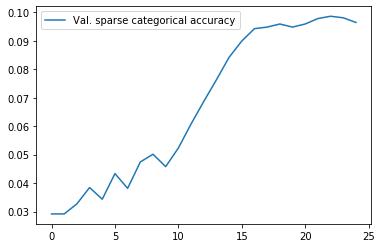

In [8]:
# Plot the prediction accuracy
plt.plot(result.history["val_sparse_categorical_accuracy"], label="Val. sparse categorical accuracy")
# plt.plot(result.history["val_loss"], label="Val loss")
plt.legend()

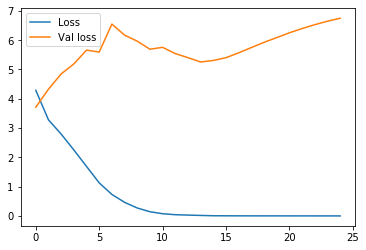

In [9]:
# Plot the loss
plt.plot(result.history["loss"], label="Loss")
plt.plot(result.history["val_loss"], label="Val loss")
plt.legend()